<a href="https://colab.research.google.com/github/mehak132002/LOAN_PAYABLE/blob/main/LoanDataset_LoansDatasest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/LoanDataset - LoansDatasest.csv')

In [ ]:
df.head()

,customer_id,customer_age,customer_income,home_ownership,employment_duration,loan_intent,loan_grade,loan_amnt,loan_int_rate,term_years,historical_default,cred_hist_length,Current_loan_status
0,1.0,22,59000,RENT,123.0,PERSONAL,C,"£35,000.00",16.02,10,Y,3,DEFAULT
1,2.0,21,9600,OWN,5.0,EDUCATION,A,"£1,000.00",11.14,1,NaN,2,NO DEFAULT
2,3.0,25,9600,MORTGAGE,1.0,MEDICAL,B,"£5,500.00",12.87,5,N,3,DEFAULT
3,4.0,23,65500,RENT,4.0,MEDICAL,B,"£35,000.00",15.23,10,N,2,DEFAULT
4,5.0,24,54400,RENT,8.0,MEDICAL,B,"£35,000.00",14.27,10,Y,4,DEFAULT


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32586 entries, 0 to 32585
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer_id          32583 non-null  float64
 1   customer_age         32586 non-null  int64  
 2   customer_income      32586 non-null  object 
 3   home_ownership       32586 non-null  object 
 4   employment_duration  31691 non-null  float64
 5   loan_intent          32586 non-null  object 
 6   loan_grade           32586 non-null  object 
 7   loan_amnt            32585 non-null  object 
 8   loan_int_rate        29470 non-null  float64
 9   term_years           32586 non-null  int64  
 10  historical_default   11849 non-null  object 
 11  cred_hist_length     32586 non-null  int64  
 12  Current_loan_status  32582 non-null  object 
dtypes: float64(3), int64(3), object(7)
memory usage: 3.2+ MB


In [ ]:
df.describe()

,customer_id,customer_age,employment_duration,loan_int_rate,term_years,cred_hist_length
count,32583.000000,32586.000000,31691.000000,29470.000000,32586.000000,32586.000000
mean,16289.497806,27.732769,4.790161,11.011553,4.761738,5.804026
std,9405.919628,6.360528,4.142746,3.240440,2.471107,4.055078
min,1.000000,3.000000,0.000000,5.420000,1.000000,2.000000
25%,8144.500000,23.000000,2.000000,7.900000,3.000000,3.000000
50%,16288.000000,26.000000,4.000000,10.990000,4.000000,4.000000
75%,24433.500000,30.000000,7.000000,13.470000,7.000000,8.000000
max,32581.000000,144.000000,123.000000,23.220000,10.000000,30.000000


In [ ]:
df.shape

(32586, 13)

In [ ]:
df.isnull().sum()

customer_id                3
customer_age               0
customer_income            0
home_ownership             0
employment_duration      895
loan_intent                0
loan_grade                 0
loan_amnt                  1
loan_int_rate           3116
term_years                 0
historical_default     20737
cred_hist_length           0
Current_loan_status        4
dtype: int64

In [ ]:
df = df.drop(columns=['historical_default' , 'customer_id' ] , axis = 1)

In [ ]:
df['loan_int_rate'].fillna(df['loan_int_rate'].mean() , inplace = True)

In [ ]:
df['employment_duration'].fillna(df[ 'employment_duration'].mean() , inplace = True)

In [ ]:
print(df['Current_loan_status'].mode())

0    NO DEFAULT
Name: Current_loan_status, dtype: object


In [ ]:
df['Current_loan_status'].fillna(df['Current_loan_status'].mode()[0] , inplace = True )

In [ ]:
df.isnull().sum()

customer_age           0
customer_income        0
home_ownership         0
employment_duration    0
loan_intent            0
loan_grade             0
loan_amnt              1
loan_int_rate          0
term_years             0
cred_hist_length       0
Current_loan_status    0
dtype: int64

In [ ]:
symbols = []
valid = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '.']
for i in range(df['loan_amnt'].shape[0]):
    for j in range(len(str(df['loan_amnt'].values[i]))):
        if (not str(df['loan_amnt'].values[i])[j] in valid) and (not str(df['loan_amnt'].values[i])[j] in symbols):
            symbols.append(str(df['loan_amnt'].values[i])[j])

print(symbols)

['£', ',', 'n', 'a']


In [ ]:
!pip install wolta==0.2.5

In [ ]:
from wolta.data_tools import extract_float

df['loan_amnt'] = extract_float(df['loan_amnt'], ['£', ','])
df['loan_amnt'] = df['loan_amnt'].replace({'n': 0., 'a': 0.})
df['loan_amnt'] = df['loan_amnt'].fillna(np.nanmean(df['loan_amnt'].values))

In [ ]:
df['customer_income'] = extract_float(df['customer_income'], [','])

In [ ]:
df['loan_amnt'].fillna(df['loan_amnt'].mean() , inplace = True)

In [ ]:
df.isnull().sum()

customer_age           0
customer_income        0
home_ownership         0
employment_duration    0
loan_intent            0
loan_grade             0
loan_amnt              0
loan_int_rate          0
term_years             0
cred_hist_length       0
Current_loan_status    0
dtype: int64

## visulization

In [ ]:
df['loan_intent'].value_counts()

loan_intent
EDUCATION            6454
MEDICAL              6072
VENTURE              5718
PERSONAL             5523
DEBTCONSOLIDATION    5213
HOMEIMPROVEMENT      3606
Name: count, dtype: int64

In [ ]:
df['home_ownership'].value_counts()

home_ownership
RENT        16451
MORTGAGE    13444
OWN          2584
OTHER         107
Name: count, dtype: int64

In [ ]:
df['loan_grade'].value_counts()

loan_grade
A    15661
B     9065
C     4926
D     2629
E      305
Name: count, dtype: int64

In [ ]:
df['Current_loan_status'].value_counts()

Current_loan_status
NO DEFAULT    25746
DEFAULT        6840
Name: count, dtype: int64

In [ ]:
sns.set()

<Axes: xlabel='loan_intent', ylabel='count'>

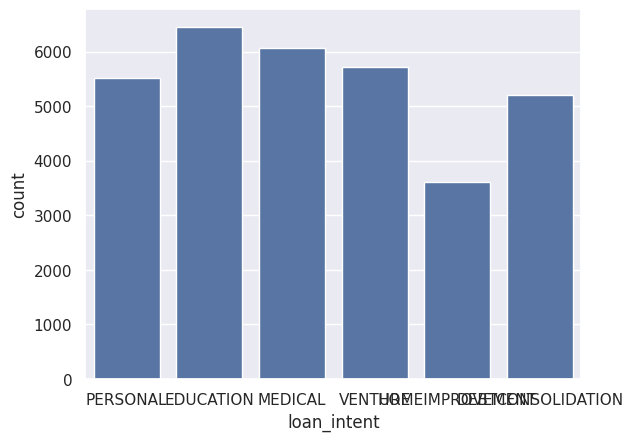

In [ ]:
sns.countplot(x='loan_intent', data=df)

<Axes: xlabel='home_ownership', ylabel='count'>

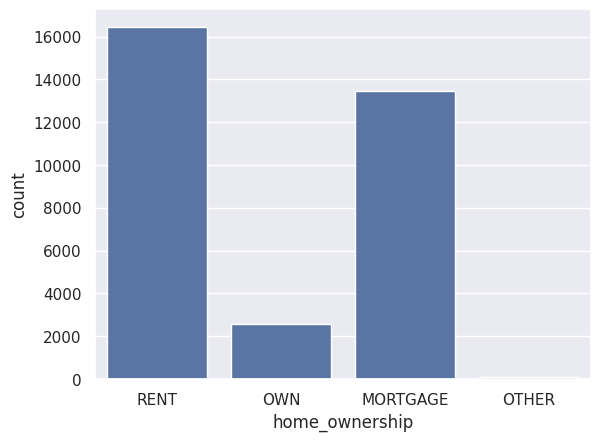

In [ ]:
sns.countplot(x='home_ownership', data=df)

In [ ]:
df.replace({'home_ownership' :{'RENT': 0 ,'OWN': 1 ,'MORTGAGE': 2 ,'OTHER' : 3},
            'loan_intent' : {'EDUCATION': 0 , 'MEDICAL' : 1 , 'VENTURE' : 2, 'PERSONAL' : 3, 'HOMEIMPROVEMENT' : 4, 'DEBTCONSOLIDATION' : 5} ,
            'loan_grade' : {'A' : 0 , 'B' : 1 , 'C' : 2 , 'D' : 3 , 'E' : 4 , 'F' : 5 , 'G' : 6 , 'H' : 7} ,
            'Current_loan_status' : {'N' : 0 , 'Y' : 1}
            } , inplace = True)

In [ ]:
df.head()

,customer_age,customer_income,home_ownership,employment_duration,loan_intent,loan_grade,loan_amnt,loan_int_rate,term_years,cred_hist_length,Current_loan_status
0,22,59000.0,0,123.0,3,2,35000.0,16.02,10,3,DEFAULT
1,21,9600.0,1,5.0,0,0,1000.0,11.14,1,2,NO DEFAULT
2,25,9600.0,2,1.0,1,1,5500.0,12.87,5,3,DEFAULT
3,23,65500.0,0,4.0,1,1,35000.0,15.23,10,2,DEFAULT
4,24,54400.0,0,8.0,1,1,35000.0,14.27,10,4,DEFAULT


In [ ]:
X= df.drop(columns=['Current_loan_status'] , axis = 1)
y= df['Current_loan_status']
print(X)
print(y)

       customer_age customer_income  home_ownership  employment_duration  \
0                22         59000.0               0                123.0   
1                21          9600.0               1                  5.0   
2                25          9600.0               2                  1.0   
3                23         65500.0               0                  4.0   
4                24         54400.0               0                  8.0   
...             ...             ...             ...                  ...   
32581            57         53000.0               2                  1.0   
32582            54        120000.0               2                  4.0   
32583            65         76000.0               0                  3.0   
32584            56        150000.0               2                  5.0   
32585            99         42000.0               0                  2.0   

       loan_intent  loan_grade  loan_amnt  loan_int_rate  term_years  \
0              

In [ ]:
from sklearn.model_selection import train_test_split
X_train ,X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 2)

In [ ]:
# from sklearn.linear_model import LogisticRegression
# model = LogisticRegression()

In [ ]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [ ]:
model.fit(X_train , y_train)

GaussianNB()

In [ ]:
X_train_pred = model.predict(X_train)
print(X_train_pred)

['DEFAULT' 'NO DEFAULT' 'NO DEFAULT' ... 'NO DEFAULT' 'NO DEFAULT'
 'NO DEFAULT']


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train, X_train_pred)

0.8079637870185669

In [ ]:
X_test_pred = model.predict(X_test)
print(X_test_pred)

['NO DEFAULT' 'DEFAULT' 'NO DEFAULT' ... 'NO DEFAULT' 'NO DEFAULT'
 'DEFAULT']


In [ ]:
accuracy_score(y_test, X_test_pred)

0.804848112918073